# numpy 与 torch

In [1]:
import torch
import numpy as np

In [2]:
np_data=np.arange(6).reshape((2,3))
np_data

array([[0, 1, 2],
       [3, 4, 5]])

In [3]:
# 张量
torch_data=torch.from_numpy(np_data)

In [4]:
torch_data


 0  1  2
 3  4  5
[torch.LongTensor of size 2x3]

In [5]:
# Tensor数据转换为numpy
torch_data.numpy()

array([[0, 1, 2],
       [3, 4, 5]])

In [6]:
# abs
data=[-1,-2,1,-4]
tensor=torch.FloatTensor(data)
tensor


-1
-2
 1
-4
[torch.FloatTensor of size 4]

In [7]:
np.abs(data)

array([1, 2, 1, 4])

In [8]:
torch.abs(tensor)


 1
 2
 1
 4
[torch.FloatTensor of size 4]

In [9]:
# mean
np.mean(data)

-1.5

In [10]:
torch.mean(tensor)

-1.5

In [11]:
# 矩阵乘法
data=[[1,2],[3,4]]
np.matmul(data,data)

array([[ 7, 10],
       [15, 22]])

In [12]:
tensor=torch.FloatTensor(data)

In [13]:
torch.mm(tensor,tensor)


  7  10
 15  22
[torch.FloatTensor of size 2x2]

In [14]:
# 上述numpy的matmul可以用dot替代
np.dot(data,data)

array([[ 7, 10],
       [15, 22]])

# PyTorch的自动求导包autograd中的Variable (变量)

In [15]:
from torch.autograd import Variable

tensor=torch.FloatTensor([[1,2],[3,4]])
variable=Variable(tensor,requires_grad=True)  # requires_grad默认为False,这个参数的作用是要不要把这个Variable涉
                                              # 及到反向传播的过程中去,去计算Variable这个节点的梯度

In [16]:
tensor


 1  2
 3  4
[torch.FloatTensor of size 2x2]

In [17]:
variable

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]

In [18]:
# 上面来看二者没太大区别
'''
实际呢Variable在计算时,他在后台一步步搭建着一个庞大的系统,叫做计算图,这个图用来将所有的节点的计算步骤都连接起来,最后进行反向传递时
一次性将Variable中的梯度计算出来,tensor没有和这个能力
'''
t_out=torch.mean(tensor*tensor)
v_out=torch.mean(variable*variable)

In [19]:
t_out

7.5

In [20]:
v_out

Variable containing:
 7.5000
[torch.FloatTensor of size 1]

In [21]:
# Variable的反向传递
v_out.backward()

In [22]:
variable.grad

Variable containing:
 0.5000  1.0000
 1.5000  2.0000
[torch.FloatTensor of size 2x2]

In [23]:
variable.data  # 获取Variable的tensor


 1  2
 3  4
[torch.FloatTensor of size 2x2]

# Activation Function 激活函数

In [24]:
# 导入激活函数所在的库
import torch.nn.functional as F
# 导入数据可视化的模块
import matplotlib.pyplot as plt
# 制造一些假数据
x=torch.linspace(-5,5,200)
print(type(x))
x=Variable(x)
print(x.shape)

<class 'torch.FloatTensor'>
torch.Size([200])


In [25]:
# 由于matplotlib画图只识别numpy array所以将数据转化
x_np=x.data.numpy()
type(x_np)

numpy.ndarray

In [26]:
# 几种常用的激活函数
y_relu=F.relu(x).data.numpy()
y_sigmoid=F.sigmoid(x).data.numpy()
y_tanh=F.tanh(x).data.numpy()
y_softplus=F.softplus(x).data.numpy()

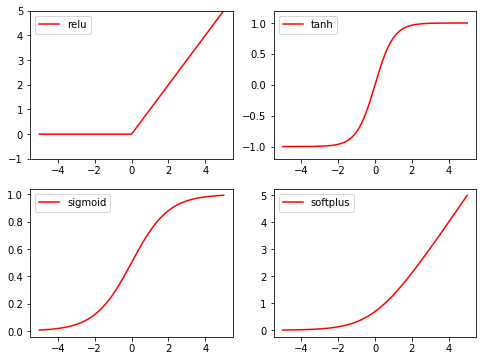

In [27]:
plt.figure(1,figsize=(8,6))
plt.subplot(221)
plt.plot(x_np,y_relu,c='red',label='relu')
plt.ylim((-1,5))
plt.legend(loc='best')

plt.figure(1,figsize=(8,6))
plt.subplot(222)
plt.plot(x_np,y_tanh,c='red',label='tanh')
plt.ylim((-1.2,1.2))
plt.legend(loc='best')

plt.figure(1,figsize=(8,6))
plt.subplot(223)
plt.plot(x_np,y_sigmoid,c='red',label='sigmoid')
plt.legend(loc='best')

plt.figure(1,figsize=(8,6))
plt.subplot(224)
plt.plot(x_np,y_softplus,c='red',label='softplus')
plt.legend(loc='best')